In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.03302192687988281


In [5]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=10,
    validation_split=0.01)

Train on 3671 samples, validate on 38 samples
Epoch 1/10
3671/3671 [==============================] - 5s - loss: 6.6581e-04 - val_loss: 3.7946e-04
Epoch 2/10
3671/3671 [==============================] - 5s - loss: 8.0000e-04 - val_loss: 6.6235e-04
Epoch 3/10
3671/3671 [==============================] - 5s - loss: 5.4892e-04 - val_loss: 4.3968e-04
Epoch 4/10
3671/3671 [==============================] - 5s - loss: 6.1213e-04 - val_loss: 4.5476e-04
Epoch 5/10
3671/3671 [==============================] - 5s - loss: 5.3970e-04 - val_loss: 3.9827e-04
Epoch 6/10
3671/3671 [==============================] - 5s - loss: 4.9756e-04 - val_loss: 2.4795e-04
Epoch 7/10
3671/3671 [==============================] - 5s - loss: 4.3541e-04 - val_loss: 3.3537e-04
Epoch 8/10
3671/3671 [==============================] - 5s - loss: 4.6201e-04 - val_loss: 2.7133e-04
Epoch 9/10
3671/3671 [==============================] - 5s - loss: 4.0350e-04 - val_loss: 6.1437e-04
Epoch 10/10
3671/3671 [======================

In [14]:
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)

yo


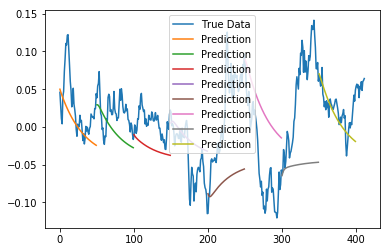

In [15]:
lstm.plot_results_multiple(predictions, y_test,50)